# Library Import and Environment Setting

In [5]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.style.use('seaborn')
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['axes.labelsize'] = 30
mpl.rcParams['axes.titlesize'] = 40
mpl.rcParams['legend.fontsize'] = 30

In [1]:
# basic_nodes
class plus_node:
  def __init__(self):
    self._x, self._y = None, None
    self._z = None
      
  def forward(self,x,y):
    self._x, self._y = x, y
    self._z = self._x + self._y
    return self._z
  
  def backward(self, dz): # dz = dJ/dz
    return dz*1,dz*1 #dJ/dx= dJ/dz * dz/dx, dJ/dy

class minus_node:
  def __init__(self):
    self._x, self._y = None, None
    self._z = None

  def forward(self, x, y):
    self._x, self._y = x, y
    self._z = self._x - self._y
    return self._z

  def backward(self, dz):
    return 1*dz, -1*dz

class mul_node:
  def __init__(self):
    self._x, self._y = None, None
    self._z = None

  def forward(self, x, y):
    self._x , self._y = x, y
    self._z = self._x * self._y
    return self._z

  def backward(self, dz):
    return dz*self._y, dz*self._x # dJ/dz * dz/dx, dJ/dy

class square_node:
  def __init__(self):
    self._x = None
    self._z = None

  def forward(self, x):
    self._x = x
    self._z = self._x * self._x
    return self._z

  def backward(self, dz):
    return dz*(2*self._x)

class mean_node:
  def __init__(self):
    self._x = None
    self._z = None

  def forward(self, x):
    self._x = x
    self._z = np.mean(self._x) # z = 1/n *(x1+x2+...+xn)
    return self._z

  def backward(self, dz):
    dx = dz*1/len(self._x)*np.ones_like(self._x) # dJ/dx1 = dJ/dz * dz/dx1 = dJ/dz * (1/n)
    return dx

# Dataset Generation

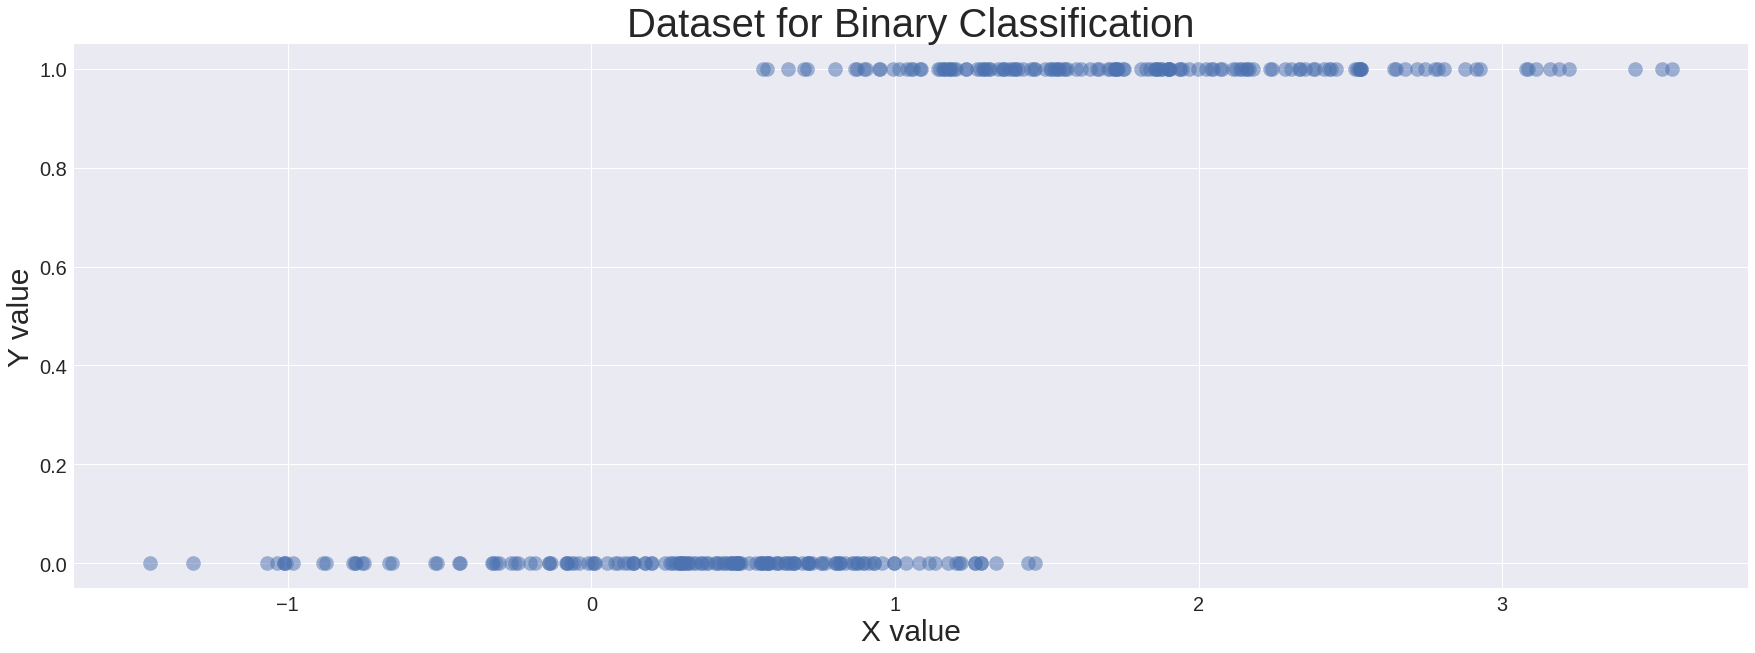

In [6]:
mean, std = 1, 1
n_sample = 300

x_data = np.random.normal(mean, std, n_sample)

noise_factor = 0.3
x_data_noise = x_data + noise_factor*np.random.normal(0,1,n_sample)

cutoff = 1
direction = 1 

if direction > 0:
  y_data = (x_data_noise > cutoff).astype(np.int) # false => 0 True => 1
else:
  y_data = (x_data_noise < cutoff).astype(np.int)

data = np.zeros(shape = (n_sample, 1)) # index 0은 빈 껍데기
data = np.hstack((data, x_data.reshape(-1,1), y_data.reshape(-1, 1)))

fig, ax = plt.subplots(figsize=(30,10))
ax.set_title("Dataset for Binary Classification")
ax.set_xlabel("X value")
ax.set_ylabel('Y value')
ax.scatter(data[:,1], data[:,-1], s=200, alpha=0.5)

## Dataset Generation Test

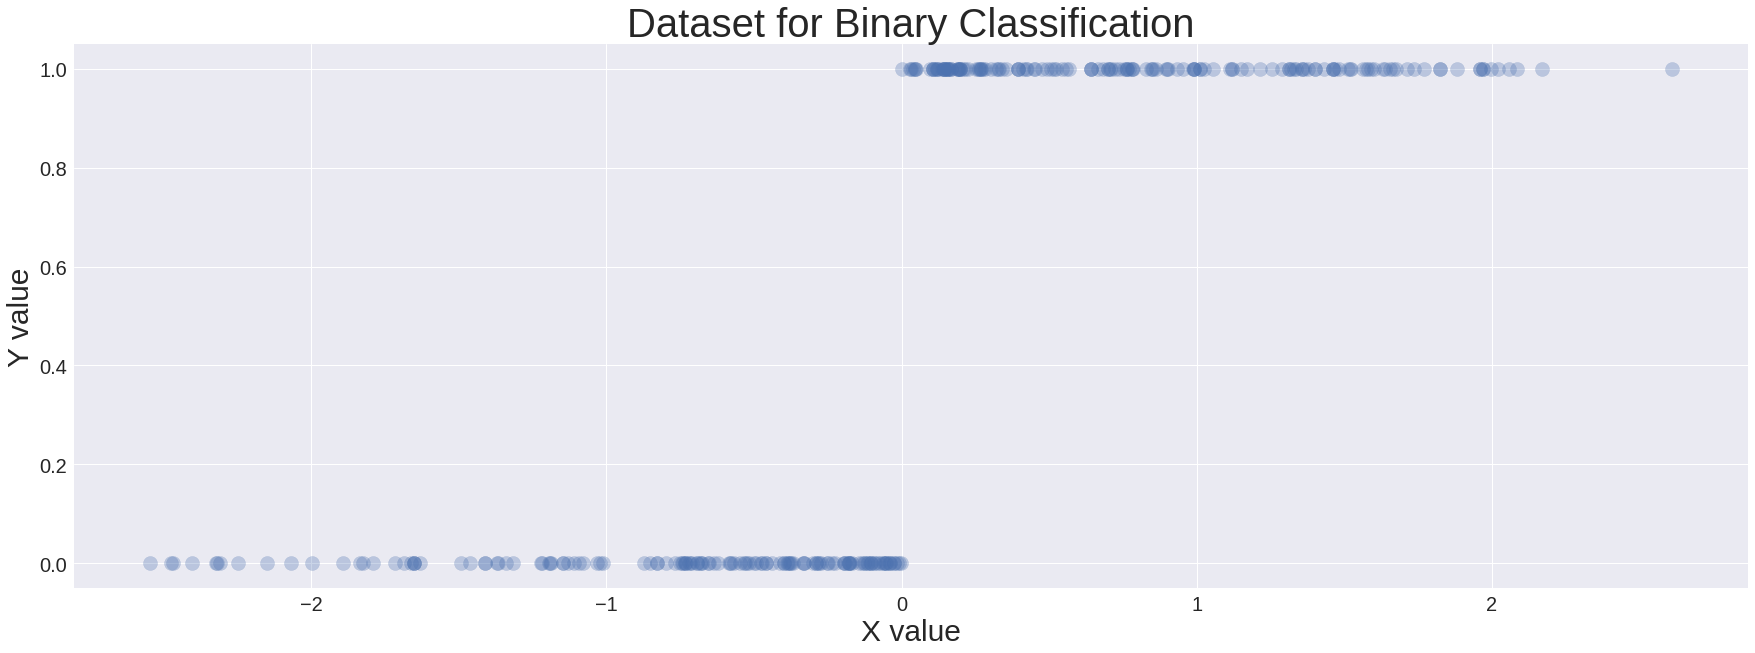

In [15]:
# setting
mean, std = 0, 1
n_sample = 300
noise_factor = 0
cutoff = 0
direction = 1

x_data = np.random.normal(mean, std, n_sample)
x_data_noise = x_data + noise_factor*np.random.normal(0,1,n_sample)

if direction > 0:
  y_data = (x_data_noise > cutoff).astype(int)
else:
  y_data = (x_data_noise < cutoff).astype(int)

data = np.zeros(shape=(n_sample, 1))
data = np.hstack((data, x_data.reshape(-1,1), y_data.reshape(-1,1)))

fig, ax = plt.subplots(figsize=(30,10))
ax.set_title("Dataset for Binary Classification")
ax.set_xlabel("X value")
ax.set_ylabel("Y value")
ax.scatter(data[:,1], data[:,-1], s=200, alpha=0.3)

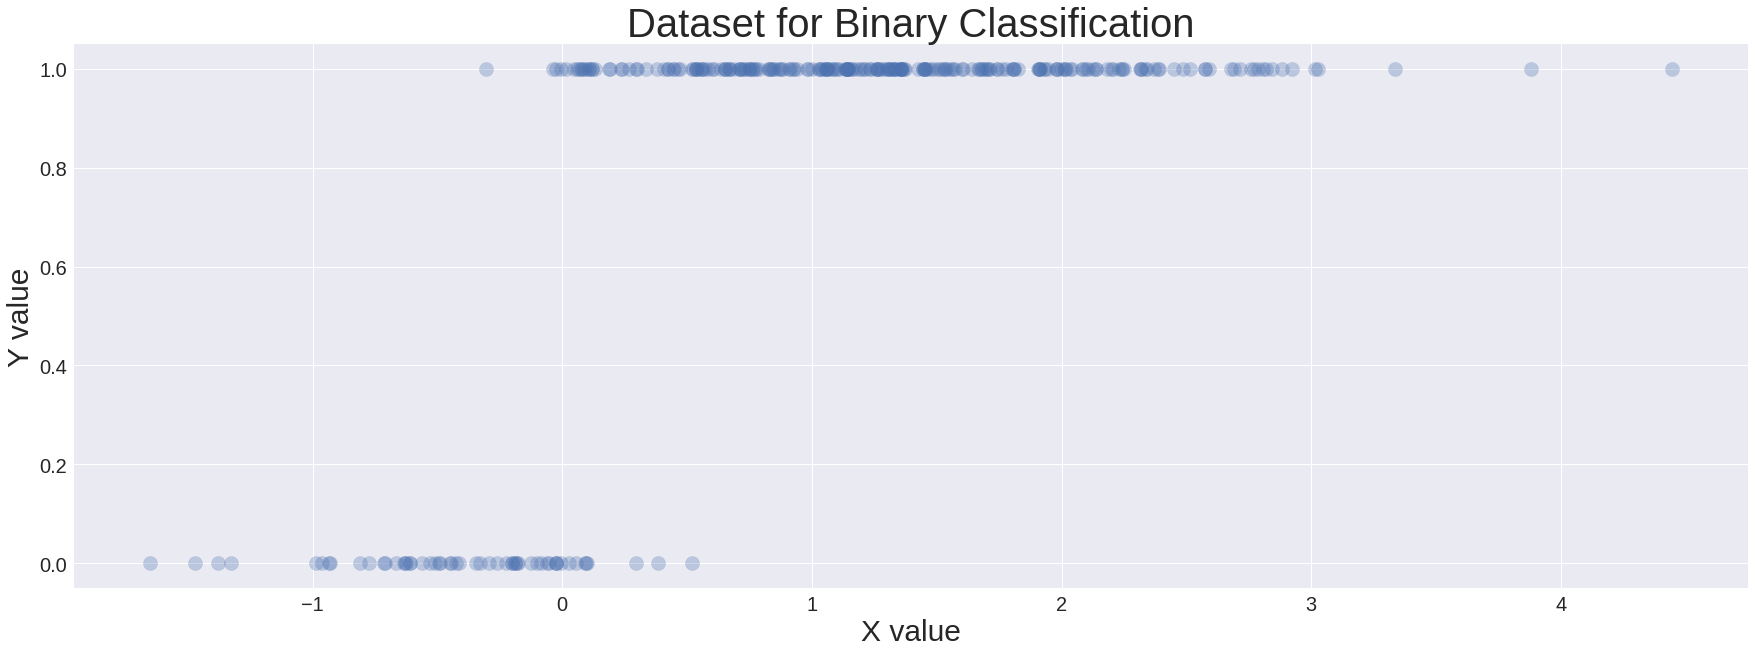

In [16]:
# setting
mean, std = 1, 1
n_sample = 300
noise_factor = 0.3
cutoff = 0
direction = 1

x_data = np.random.normal(mean, std, n_sample)
x_data_noise = x_data + noise_factor*np.random.normal(0,1,n_sample)

if direction > 0:
  y_data = (x_data_noise > cutoff).astype(int)
else:
  y_data = (x_data_noise < cutoff).astype(int)

data = np.zeros(shape=(n_sample, 1))
data = np.hstack((data, x_data.reshape(-1,1), y_data.reshape(-1,1)))

fig, ax = plt.subplots(figsize=(30,10))
ax.set_title("Dataset for Binary Classification")
ax.set_xlabel("X value")
ax.set_ylabel("Y value")
ax.scatter(data[:,1], data[:,-1], s=200, alpha=0.3)

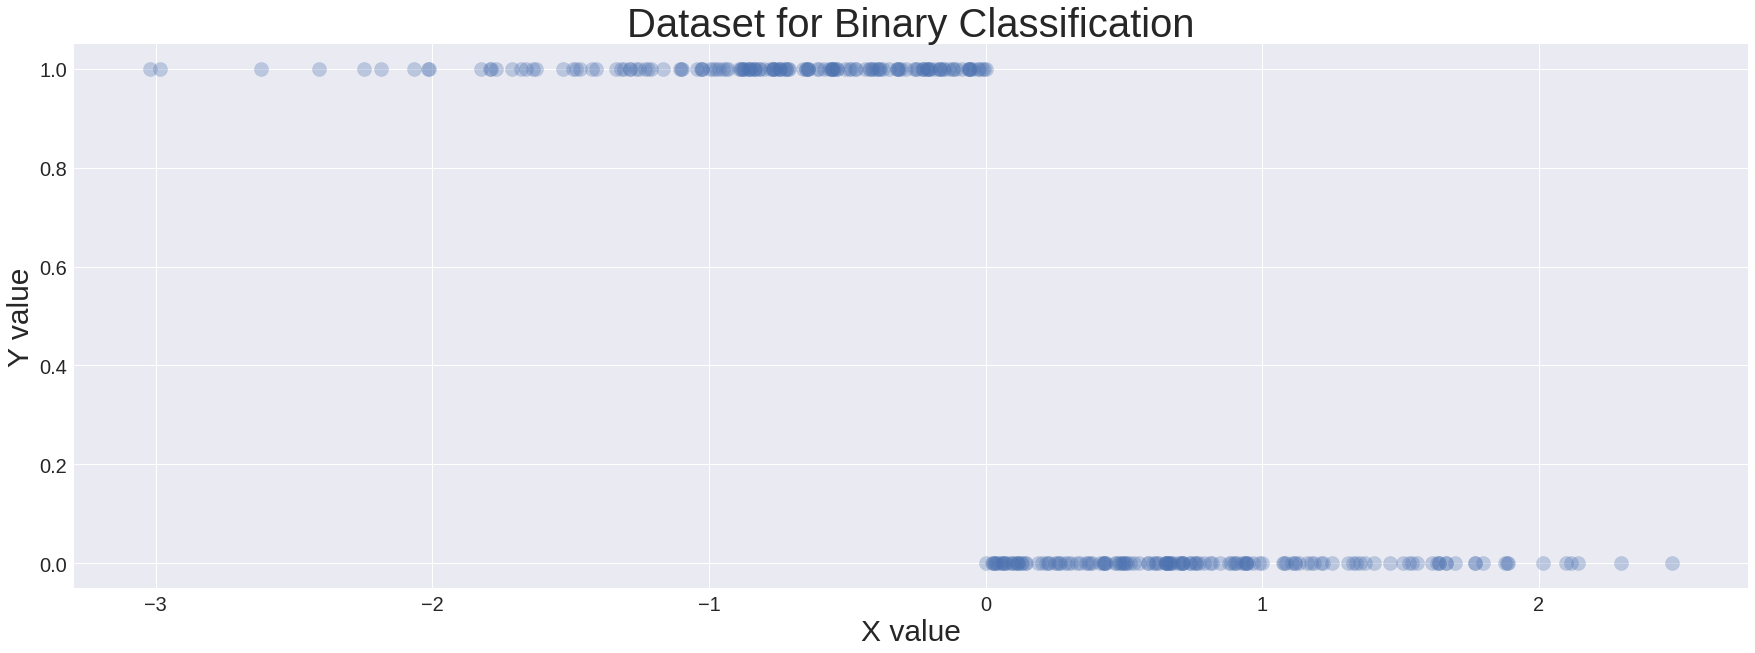

In [18]:
# setting
mean, std = 0, 1
n_sample = 300
noise_factor = 0
cutoff = 0
direction = -1

x_data = np.random.normal(mean, std, n_sample)
x_data_noise = x_data + noise_factor*np.random.normal(0,1,n_sample)

if direction > 0:
  y_data = (x_data_noise > cutoff).astype(int)
else:
  y_data = (x_data_noise < cutoff).astype(int)

data = np.zeros(shape=(n_sample, 1))
data = np.hstack((data, x_data.reshape(-1,1), y_data.reshape(-1,1)))

fig, ax = plt.subplots(figsize=(30,10))
ax.set_title("Dataset for Binary Classification")
ax.set_xlabel("X value")
ax.set_ylabel("Y value")
ax.scatter(data[:,1], data[:,-1], s=200, alpha=0.3)

## Dataset Generation Function

In [56]:
def dataset_generator(x_dict):
  x_data = np.random.normal(x_dict['mean'], x_dict['std'], x_dict['n_sample'])
  x_data_noise = x_data + x_dict['noise_factor']*np.random.normal(0,1,x_dict['n_sample'])

  if x_dict['direction'] > 0:
    y_data = (x_data_noise > x_dict['cutoff']).astype(int)
  else:
    y_data = (x_data_noise < x_dict['cutoff']).astype(int)

  data = np.zeros(shape=(x_dict['n_sample'], 1))
  data = np.hstack((data, x_data.reshape(-1,1), y_data.reshape(-1,1)))
  return data

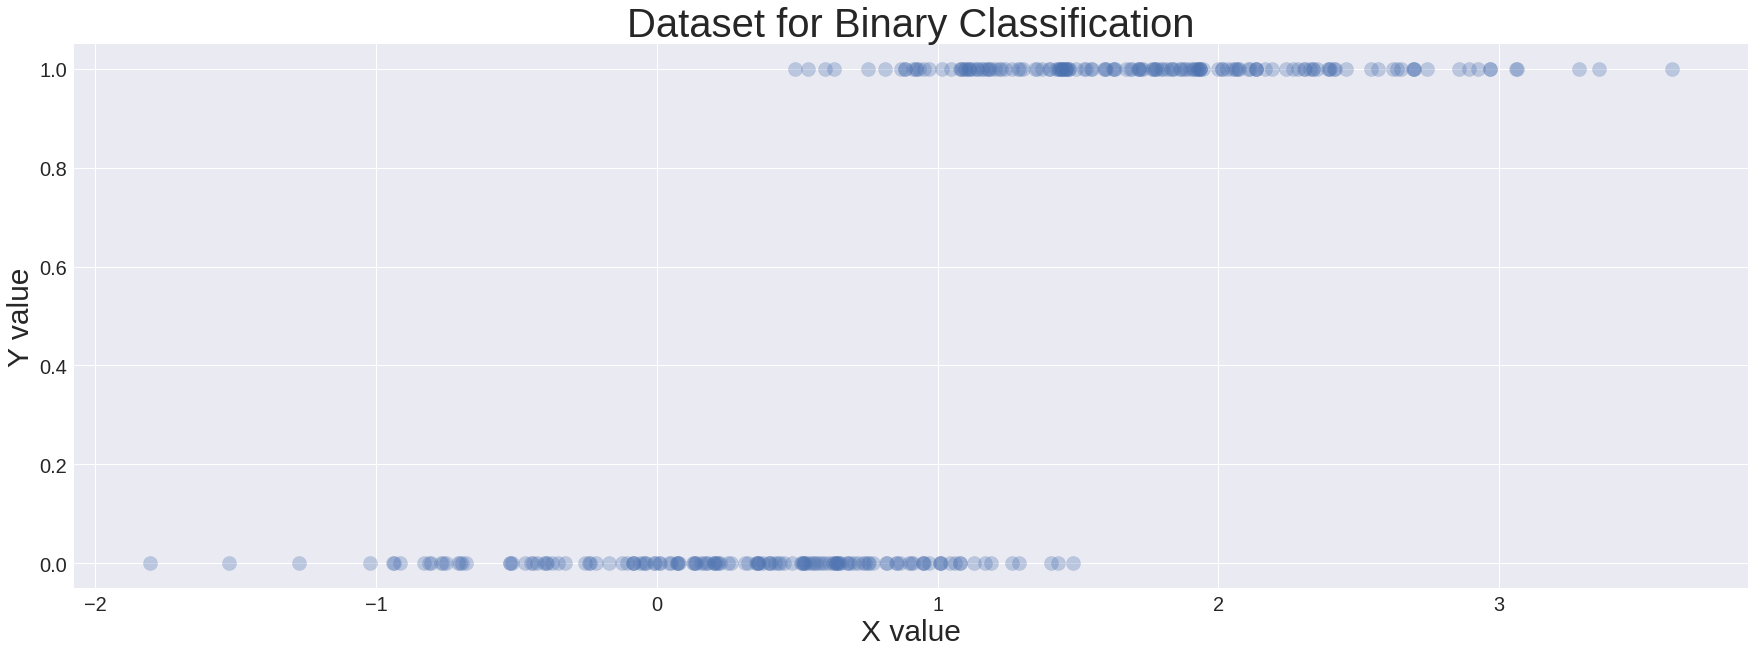

In [57]:
x_dict = {'mean':1, 'std':1, 'n_sample':300,
          'noise_factor': 0.3, 'cutoff':1, 'direction':1}

data = dataset_generator(x_dict)

fig, ax = plt.subplots(figsize=(30,10))
ax.set_title("Dataset for Binary Classification")
ax.set_xlabel("X value")
ax.set_ylabel("Y value")
ax.scatter(data[:,1], data[:,-1], s=200, alpha=0.3)

# Learning

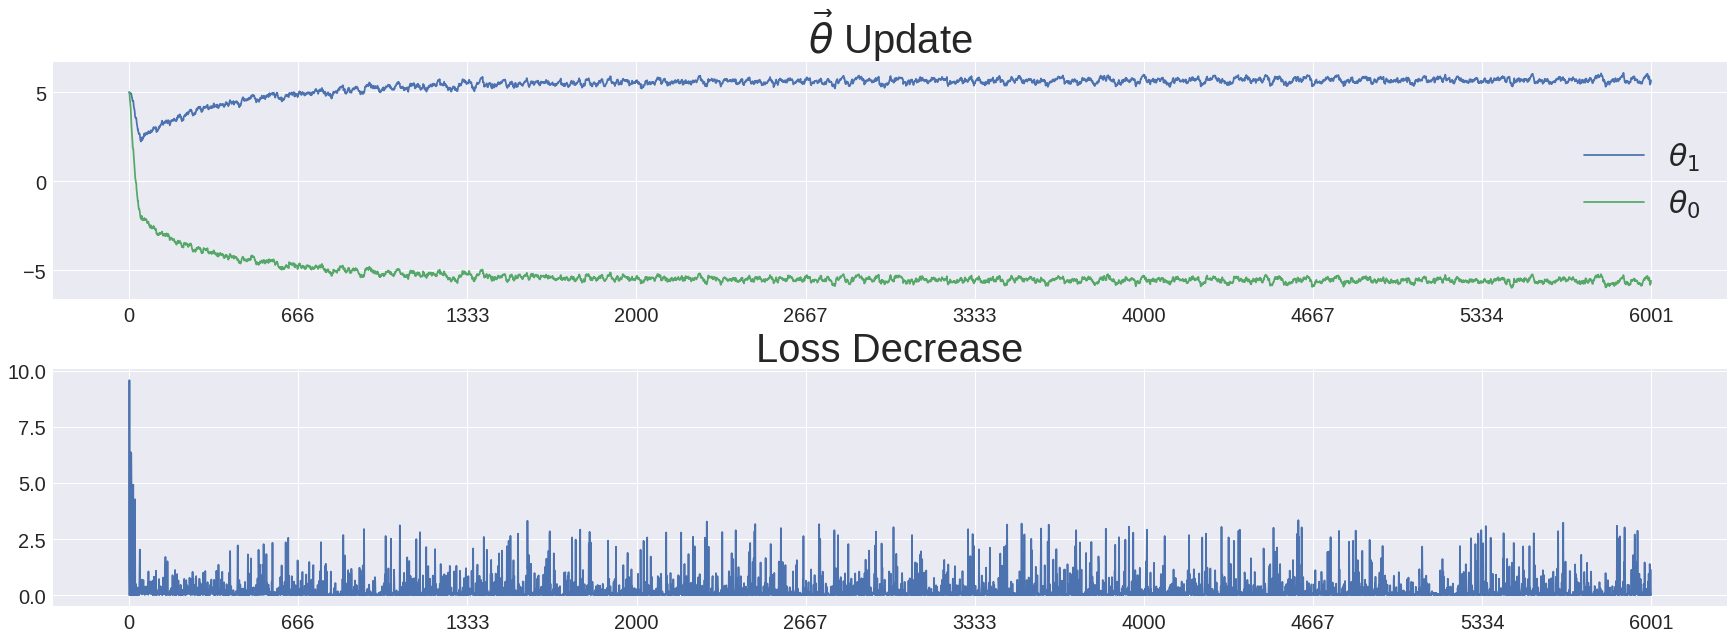

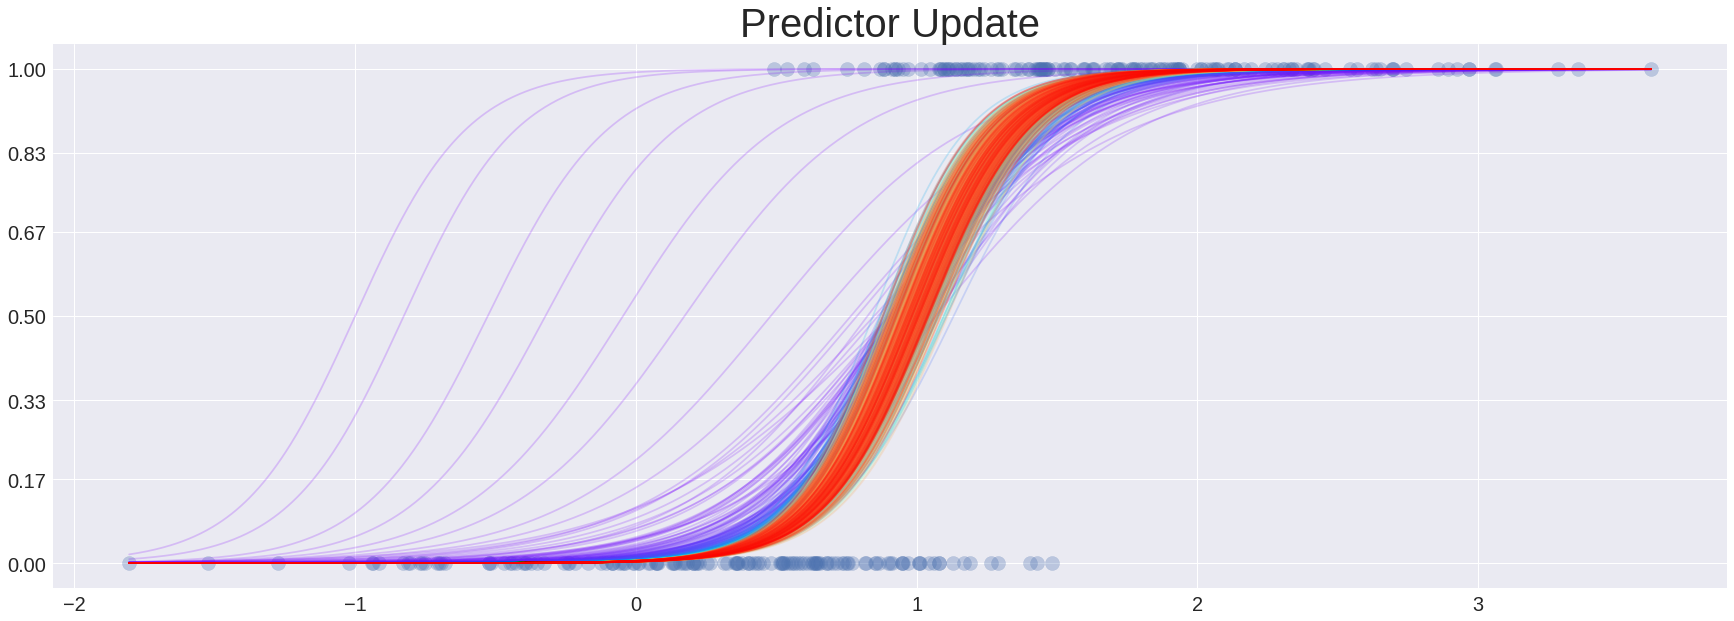

In [65]:
node1 = mul_node()
node2 = plus_node()

Th = np.array([5., 5.]).reshape(-1,1) # iniital Theta0
th_accum = Th

loss_list = []
iter_idx, check_freq = 0, 5
epochs, lr = 100, 0.1

for epoch in range(epochs):
  np.random.shuffle(data)

  for data_idx in range(data.shape[0]):
    x, y = data[data_idx,1], data[data_idx,-1]

    # forward propagation
    z1 = node1.forward(Th[1],x)
    z2 = node2.forward(Th[0], z1)
    pred = 1/(1+np.exp(-1*z2))
    loss = -1*(y*np.log(pred) + (1-y)*np.log(1-pred))
    
    # backpropagation
    dpred = (pred - y) / (pred*(1-pred))
    dz2 = dpred* (pred*(1-pred))
    dth0, dz1 = node2.backward(dz2)
    dth1, dx = node1.backward(dz1)

    # gradient descent
    Th[1] = Th[1] - lr*dth1
    Th[0] = Th[0] - lr*dth0

    # result accumulation
    if iter_idx % check_freq == 0:
      th_accum = np.hstack((th_accum, Th))
      loss_list.append(loss)
    
    iter_idx += 1

# Result Visualization
fig, ax = plt.subplots(2, 1, figsize=(30,10))
fig.subplots_adjust(hspace= 0.3)
ax[0].set_title(r'$\vec{\theta}$' + ' Update')

ax[0].plot(th_accum[1,:], label=r'$\theta_{1}$')
ax[0].plot(th_accum[0,:], label=r'$\theta_{0}$')

ax[0].legend()
iter_ticks = np.linspace(0, th_accum.shape[1], 10).astype(np.int)
ax[0].set_xticks(iter_ticks)

ax[1].set_title('Loss Decrease')
ax[1].plot(loss_list)
ax[1].set_xticks(iter_ticks)

# predictor update
n_pred = 1000
fig, ax = plt.subplots(figsize=(30,10))
ax.set_title('Predictor Update')
ax.scatter(data[:,1], data[:,-1], s=200, alpha=0.3)

ax_idx_arr = np.linspace(0, len(loss_list)-1, n_pred).astype(np.int)
cmap = cm.get_cmap('rainbow', lut=len(ax_idx_arr))

x_pred = np.linspace(np.min(data[:,1]), np.max(data[:,1]), 1000)
for ax_cnt, ax_idx in enumerate(ax_idx_arr):
  z = th_accum[1, ax_idx]*x_pred + th_accum[0, ax_idx]
  a = 1/(1+np.exp(-1*z))
  ax.plot(x_pred, a,
          color=cmap(ax_cnt),alpha=0.2)

y_ticks = np.round(np.linspace(0,1,7),2)
ax.set_yticks(y_ticks)

# module

### Affine Function / Sigmoid / Binary Cross Entropy Loss

In [71]:
# Affine
class Affine:
  def __init__(self):
    self._feature_dim = 1
    self._Th = None

    self.node_imp()
    self.random_initialization()

  def node_imp(self):
    self._node1 = mul_node()
    self._node2 = plus_node()
  
  def random_initialization(self):
    r_feature_dim = 1/self._feature_dim

    self._Th = np.random.uniform(low = -1*r_feature_dim,
                                 high = r_feature_dim,
                                 size = (self._feature_dim +1, 1))
  
  def forward(self, x):
    self._z1 = self._node1.forward(self._Th[1], x)
    self._z2 = self._node2.forward(self._Th[0], self._z1)
    return self._z2

  def backward(self, dz, lr):
    dth0, dz1 = self._node2.backward(dz)
    dth1, dx = self._node1.backward(dz1)

    self._Th[1] = self._Th[1] - lr*dth1
    self._Th[0] = self._Th[0] - lr*dth0
  
  def get_Th(self):
    return self._Th



# Sigmoid
class Sigmoid:
  def __init__(self):
      self._pred = None

  def forward(self, z):
      self._pred = 1/(1 + np.exp(-1*z))
      return self._pred
    
  def backward(self, dpred):
      partial = self._pred * (1 - self._pred)
      dz = dpred * partial
      return dz



# Binary Cross Entropy Loss
class BinaryCrossEntropy_Loss:
  def __init__(self):
    self._y, self._pred = None, None
  
  def forward(self, y, pred):
    self._y, self._pred = y, pred
    loss = -1*(y*np.log(self._pred) + (1-y)*np.log(1-pred))
    return loss

  def backward(self):
    dpred = (self._pred - self._y) / (self._pred*(1-self._pred))
    return dpred

### Learning Process

In [73]:
# Dataset Preparation
x_dict = {'mean':1, 'std':1, 'n_sample':300,
          'noise_factor':0.3, 'cutoff':1, 'direction':-1}

data = dataset_generator(x_dict)

# Moudle Implementation
affine = Affine()
sigmoid = Sigmoid()
BCE_loss = BinaryCrossEntropy_Loss()

# Learning Preparation
th_accum = affine.get_Th()
loss_list = []

epochs, lr = 300, 0.01
iter_idx, check_freq = 0, 2

# Learning
for epoch in range(epochs):
  np.random.shuffle(data)

  for data_idx in range(data.shape[0]):
    x, y = data[data_idx, 1], data[data_idx,-1]

    # Forward Propagation
    z = affine.forward(x)
    pred = sigmoid.forward(z)
    loss = BCE_loss.forward(y, pred)

    # Backpropagation
    dpred = BCE_loss.backward()
    dz = sigmoid.backward(dpred)
    affine.backward(dz, lr)

    # Result Tracking
    if iter_idx % check_freq == 0:
      th_accum = np.hstack((th_accum, affine.get_Th()))
      loss_list.append(loss)
    iter_idx += 1

### result_visualizer

In [74]:
def result_visualizer():
    global th_accum, loss_list
    fig,ax = plt.subplots(2, 1, figsize = (30,10))
    fig.subplots_adjust(hspace = 0.3)
    ax[0].set_title(r'$\vec{\theta}$' + 'Update ')

    ax[0].plot(th_accum[1,:], label = r'$\theta_{1}$')
    ax[0].plot(th_accum[0,:], label = r'$\theta_{0}$')

    ax[0].legend()
    iter_ticks = np.linspace(0,th_accum.shape[1],10).astype(np.int)
    ax[0].set_xticks(iter_ticks)

    ax[1].set_title(r'$\mathcal{L}$')
    ax[1].plot(loss_list)
    ax[1].set_xticks(iter_ticks)

    n_pred = 1000
    fig,ax = plt.subplots(figsize = (30,10))
    ax.set_title('Predictor Update')
    ax.scatter(data[:,1], data[:,-1])

    ax_idx_arr = np.linspace(0,len(loss_list)-1,n_pred).astype(np.int)
    cmap = cm.get_cmap('rainbow',lut = len(ax_idx_arr))

    x_pred = np.linspace(np.min(data[:,1]),np.max(data[:,1]),1000)
    for ax_cnt, ax_idx in enumerate(ax_idx_arr):
        z = th_accum[1, ax_idx] * x_pred + th_accum[0,ax_idx]
        a = 1/(1 + np.exp(-1 * z))
        ax.plot(x_pred, a, color = cmap(ax_cnt),alpha = 0.2)

    y_ticks = np.round(np.linspace(0, 1, 7),2)
    ax.set_yticks(y_ticks)

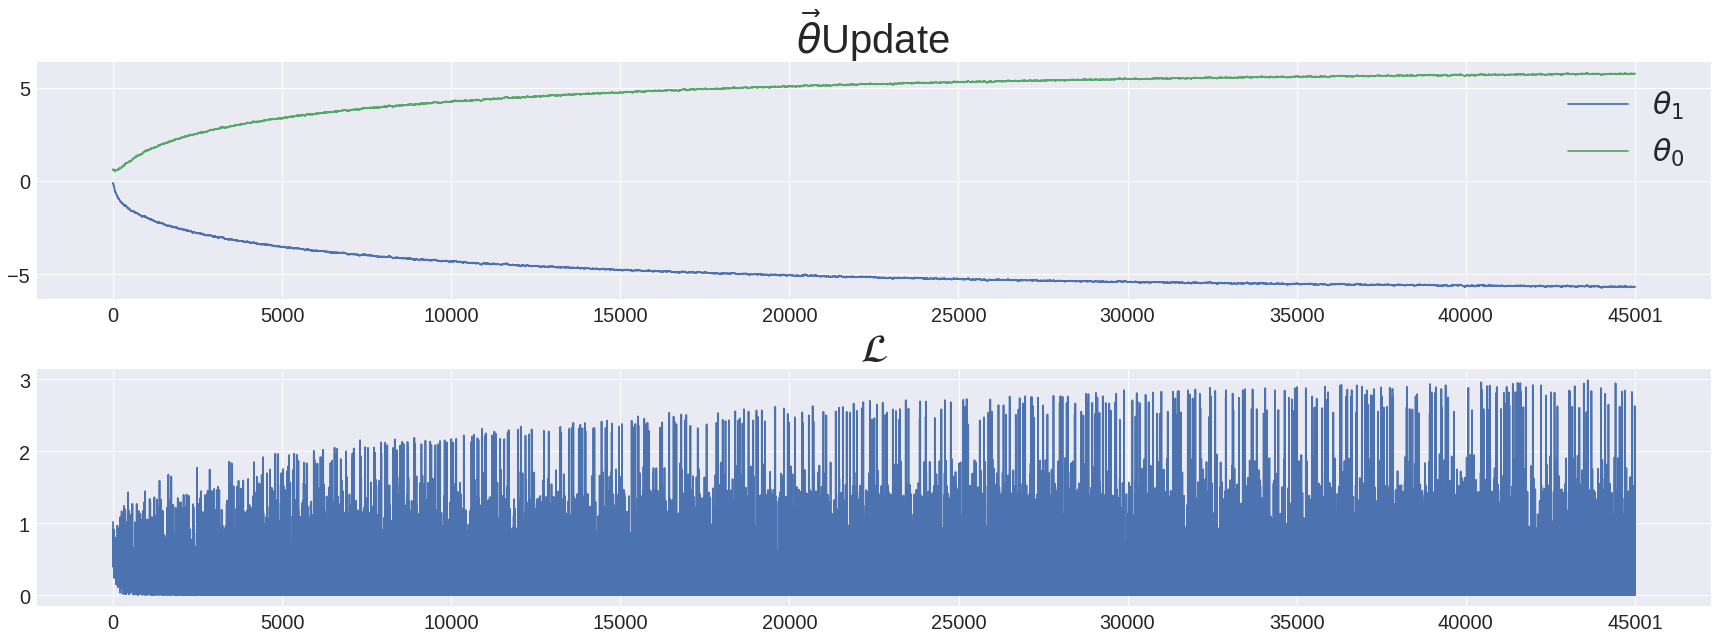

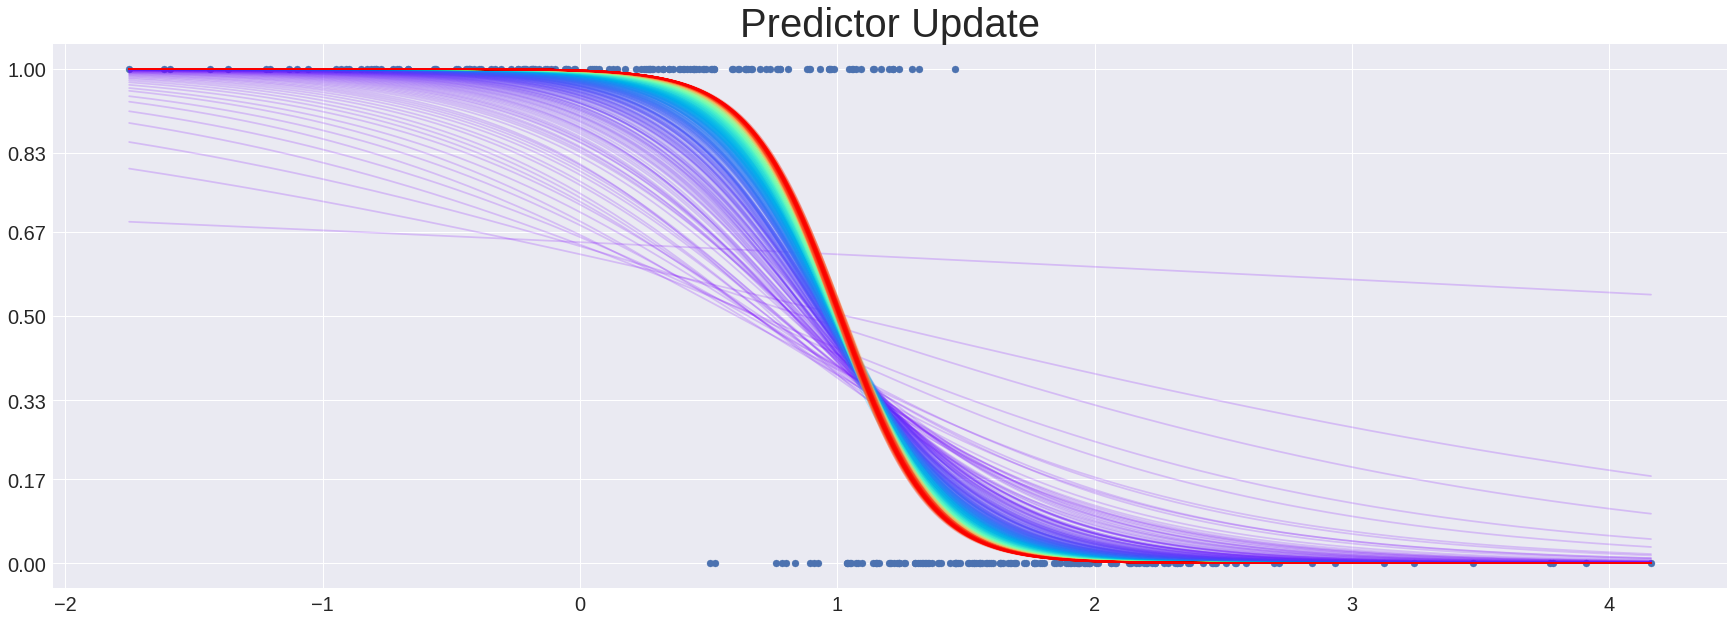

In [75]:
result_visualizer()

# Single-variate Logistic Regression Module

In [80]:
class SVLoR:
    def __init__(self):
        self._feature_dim = 1
        self._affine = Affine()
        self._sigmoid = Sigmoid()

    def forward(self, x):
        z = self._affine.forward(x)
        pred =  self._sigmoid.forward(z)
        return pred
    
    def backward(self, dpred, lr):
        dz = self._sigmoid.backward(dpred)
        self._affine.backward(dz, lr)

    def  get_Th(self):
        return self._affine.get_Th()

In [88]:
def result_tracker():
  global iter_idx, check_freq
  global th_accum, model

  if iter_idx % check_freq == 0:
    th_accum = np.hstack((th_accum, model.get_Th()))
    loss_list.append(loss)
  iter_idx += 1

### Learning Process with SVLoR Module

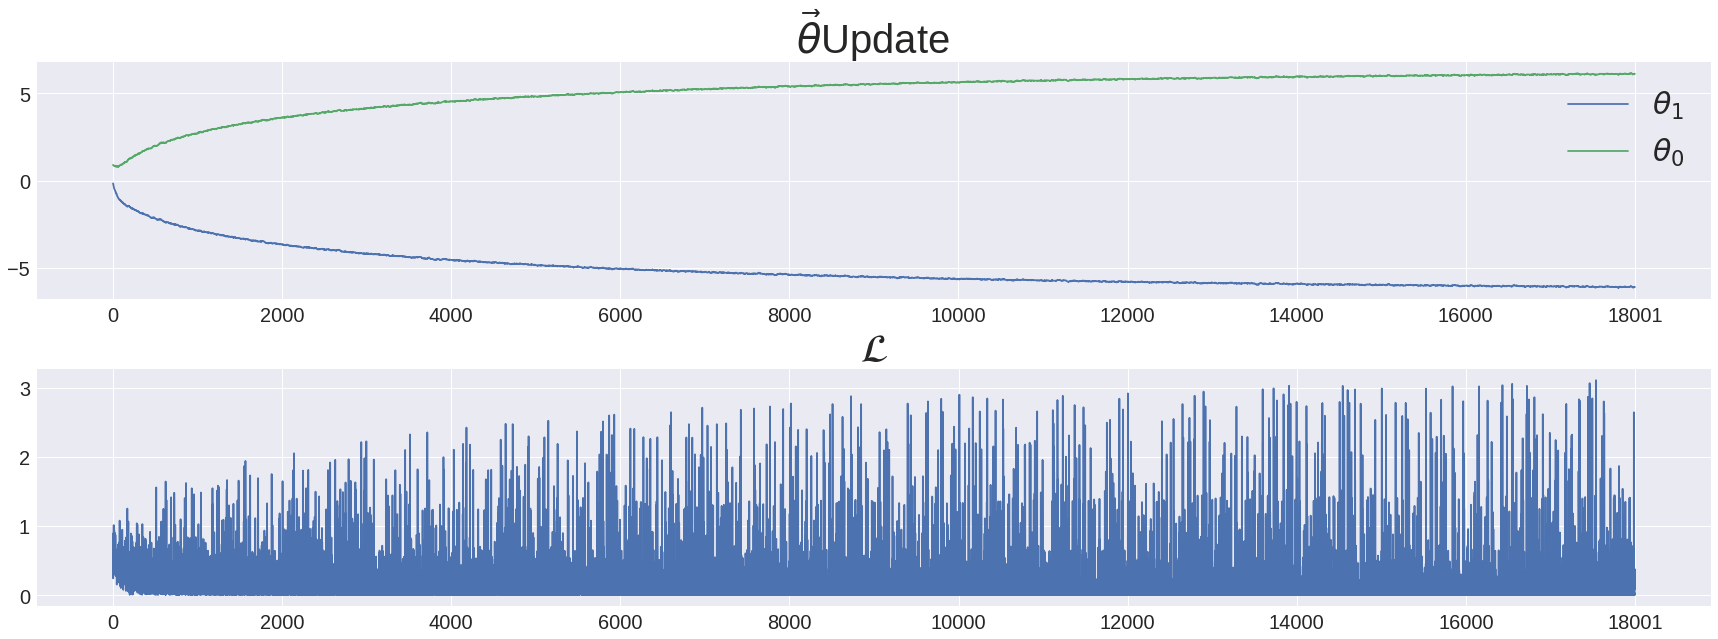

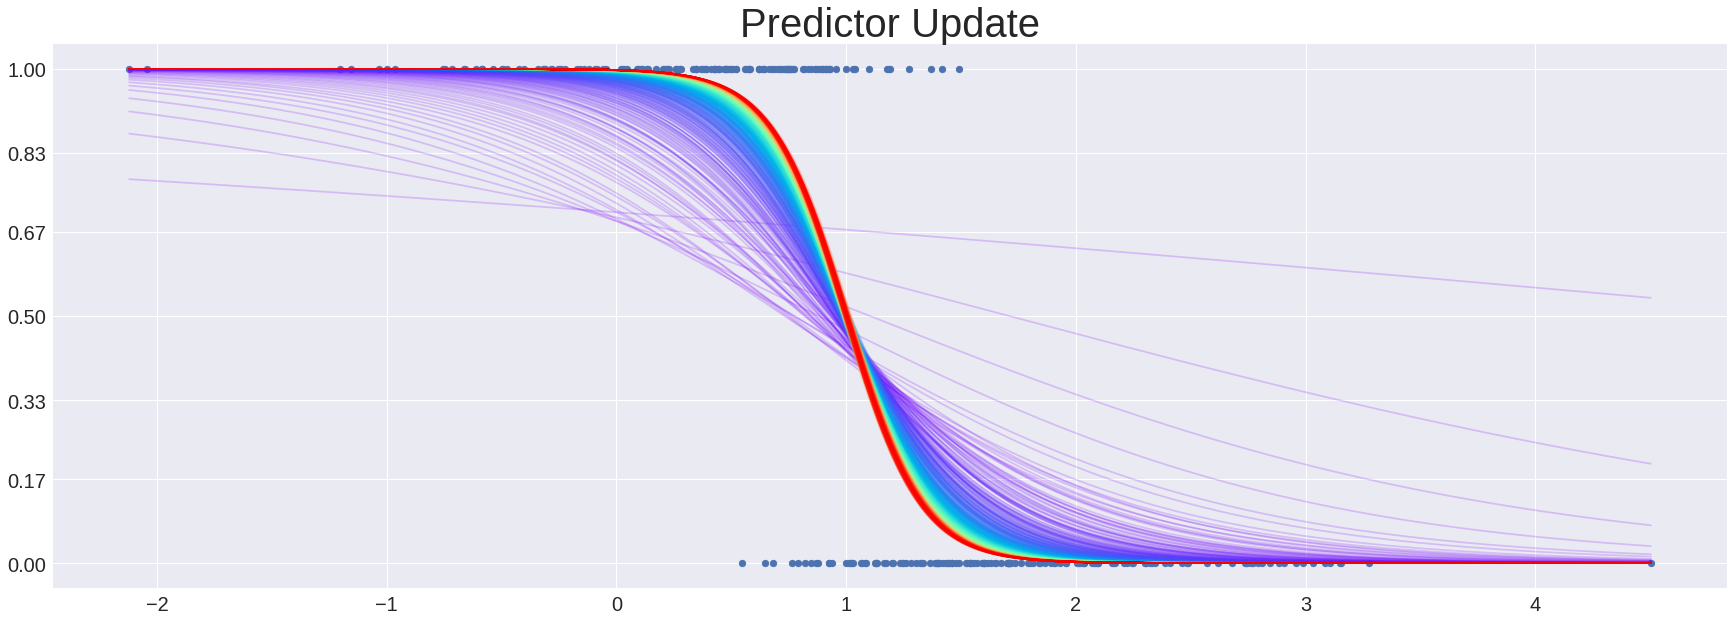

In [89]:
x_dict =  {'mean':1, 'std':1, 'n_sample':300,
            'noise_factor':0.3,
            'cutoff':1, 'direction':-1}

data = dataset_generator(x_dict)

model = SVLoR()
BCE_loss = BinaryCrossEntropy_Loss()

th_accum = model.get_Th()

loss_list = []
iter_idx, check_freq = 0, 5
epochs, lr =  300, 0.01

for epoch in range(epochs):
    np.random.shuffle(data)
    
    for data_idx in range(data.shape[0]):
        x,y =  data[data_idx, 1], data[data_idx,-1]

        pred = model.forward(x)
        loss = BCE_loss.forward(y, pred)

        dpred = BCE_loss.backward()
        model.backward(dpred, lr)

        result_tracker()

result_visualizer()